# Housing Price Prediction Project

We embarked on a journey to predict housing prices using machine learning! 🚀 After exploring and preprocessing the dataset, we delved into feature scaling, engineering a new feature, and splitting the data. 🧐 With linear regression and regularized models, we aimed to find the best fit. Evaluation metrics and diagnostics plots guided us, ensuring our predictions hit the mark. 📊🎯 Now, armed with insights and tuned models, we're ready to empower real estate decisions with accurate price predictions! 🏠💰

Shah Wali Ullah Baig

**Exploratory Data Analysis (EDA) And Prediction**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv("house_prices.csv")

# Display first 10 rows

print(df.shape)
print(df.head(10))

# Summary statistics

print(df.describe())

(1000, 5)
   area  bedrooms  bathrooms  floors          price
0  1360         2          1       2   75561.009869
1  4272         3          3       1  197449.640308
2  3592         1          2       1  180621.795096
3   966         1          2       2   45234.416477
4  4926         2          1       2  232342.452693
5  3944         5          3       1  187987.324203
6  3671         1          2       1  182560.239077
7  3419         1          1       1  181389.632565
8   630         3          3       1   25070.420087
9  2185         4          2       2  121483.813999
              area     bedrooms    bathrooms       floors          price
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.000000
mean   2815.422000     2.990000     1.973000     1.489000  141138.789936
std    1255.514921     1.427564     0.820332     0.500129   63233.613042
min     503.000000     1.000000     1.000000     1.000000    7243.014853
25%    1749.500000     2.000000     1.000000     1.00

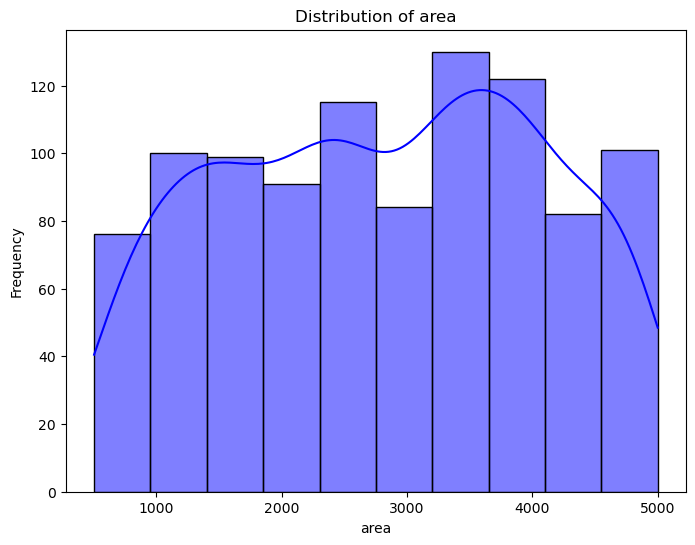

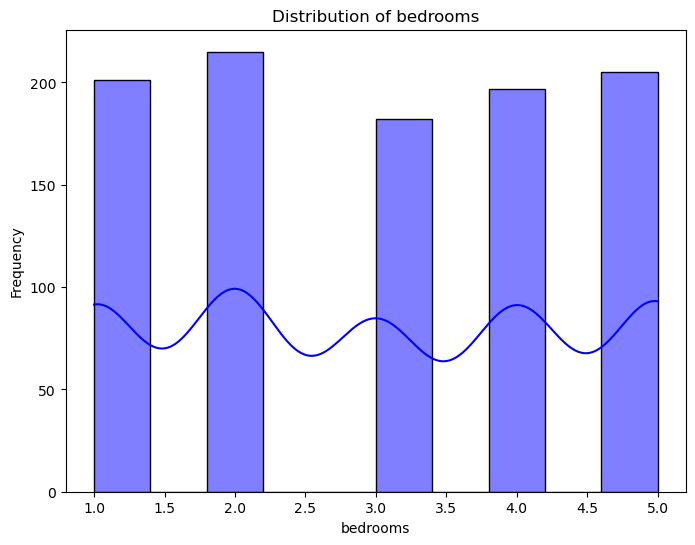

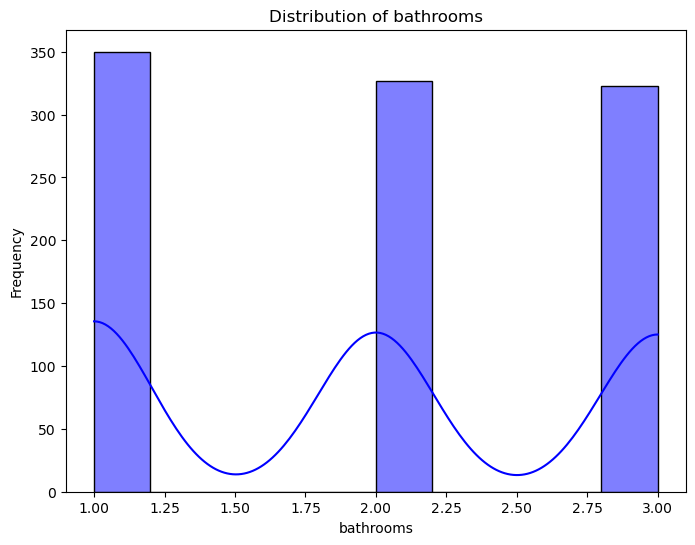

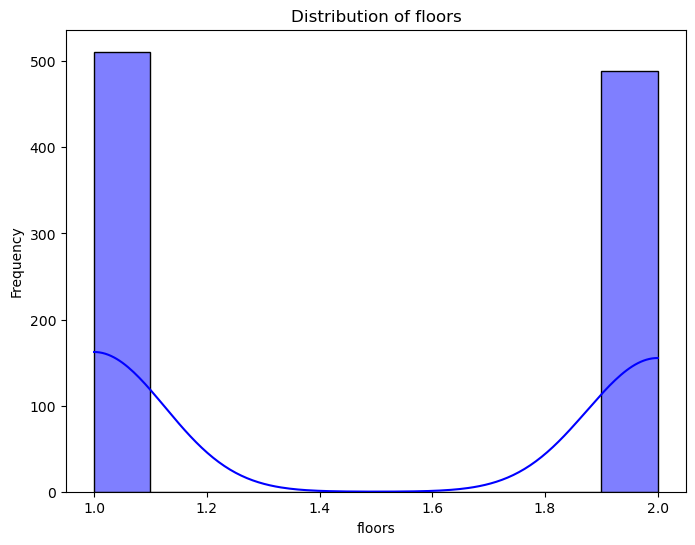

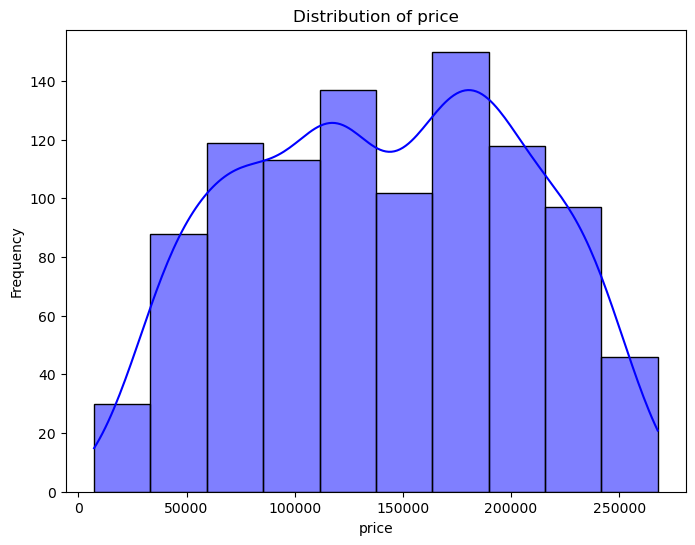

In [3]:
# Distribution of each feature

for column in df.columns:
    plt.figure(figsize=(8, 6))
    # Histogram for distribution
    sns.histplot(df[column], bins=10, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

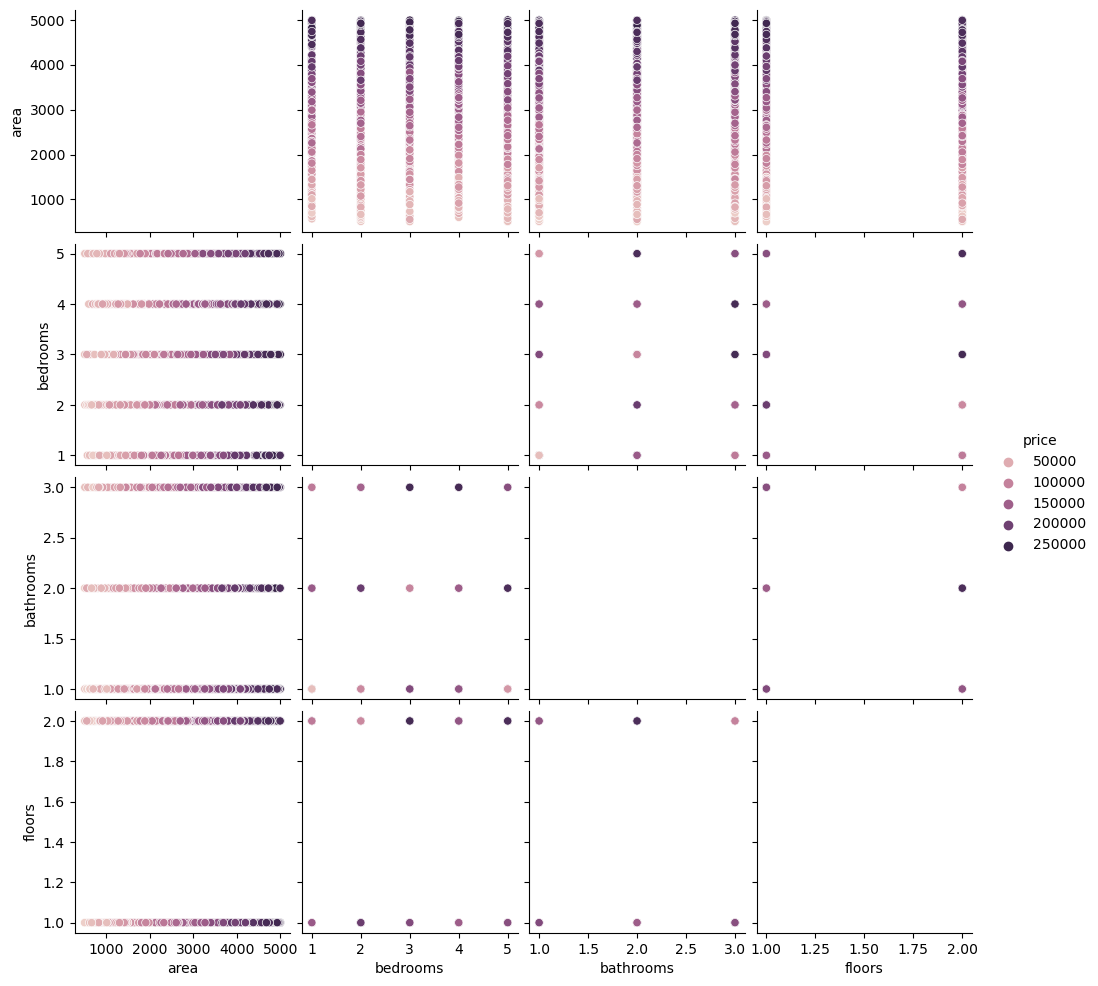

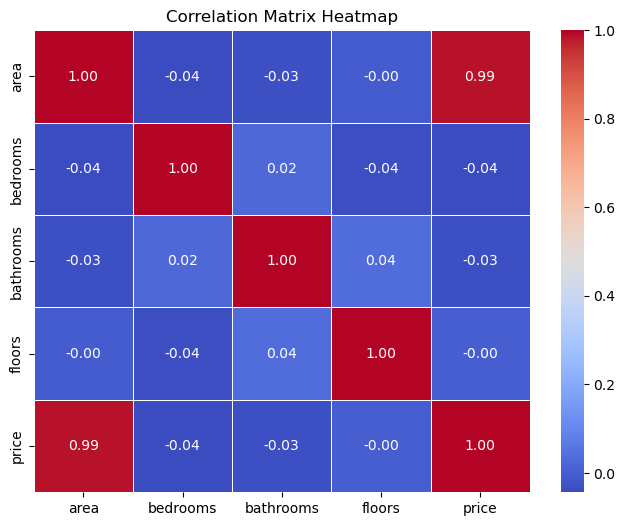

In [4]:
# Pair plots to visualize relationships between price and every other feature

sns.pairplot(df, kind='scatter', diag_kind='kde', hue='price')
plt.show()

# Find Correlation matrix using heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

**Data Preprocessing**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values

missing_values = df.isnull().sum()
print(missing_values)

# Feature scaling

X = df.drop('price', axis=1)
y = df['price']


# Feature engineering: price per square foot

df['price_per_square_foot'] = df['price'] / df['area']
print(df.head())

# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

area                     0
bedrooms                 0
bathrooms                0
floors                   0
price                    0
price_per_square_foot    0
dtype: int64
   area  bedrooms  bathrooms  floors          price  price_per_square_foot
0  1360         2          1       2   75561.009869              55.559566
1  4272         3          3       1  197449.640308              46.219485
2  3592         1          2       1  180621.795096              50.284464
3   966         1          2       2   45234.416477              46.826518
4  4926         2          1       2  232342.452693              47.166556
Training set shape: (700, 5) (700,)
Testing set shape: (300, 5) (300,)


**Model Building & Hyperparameter Tuning**

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Linear regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)
y_pred_test_linear = linear_reg_model.predict(X_test_scaled)

# Regularized models (just as examples, hyperparameters can be tuned)

# Ridge regression
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train_scaled, y_train)
y_pred_test_ridge = ridge_model.predict(X_test_scaled)

# Lasso regression
lasso_model = Lasso(alpha=1.0)  # Alpha is the regularization strength
lasso_model.fit(X_train_scaled, y_train)
y_pred_test_lasso = lasso_model.predict(X_test_scaled)

**Model Evaluation & Diagnostics**

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluation metrics
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, r2

# Evaluate linear regression model
mae_linear, r2_linear = evaluate_metrics(y_test, y_pred_test_linear)
print(f"Linear Regression - MAE: {mae_linear:.2f}, R2: {r2_linear:.2f}")

# Evaluate ridge regression model
mae_ridge, r2_ridge = evaluate_metrics(y_test, y_pred_test_ridge)
print(f"Ridge Regression - MAE: {mae_ridge:.2f}, R2: {r2_ridge:.2f}")

# Evaluate lasso regression model
mae_lasso, r2_lasso = evaluate_metrics(y_test, y_pred_test_lasso)
print(f"Lasso Regression - MAE: {mae_lasso:.2f}, R2: {r2_lasso:.2f}")

Linear Regression - MAE: 4435.59, R2: 0.99
Ridge Regression - MAE: 4435.03, R2: 0.99
Lasso Regression - MAE: 4435.68, R2: 0.99


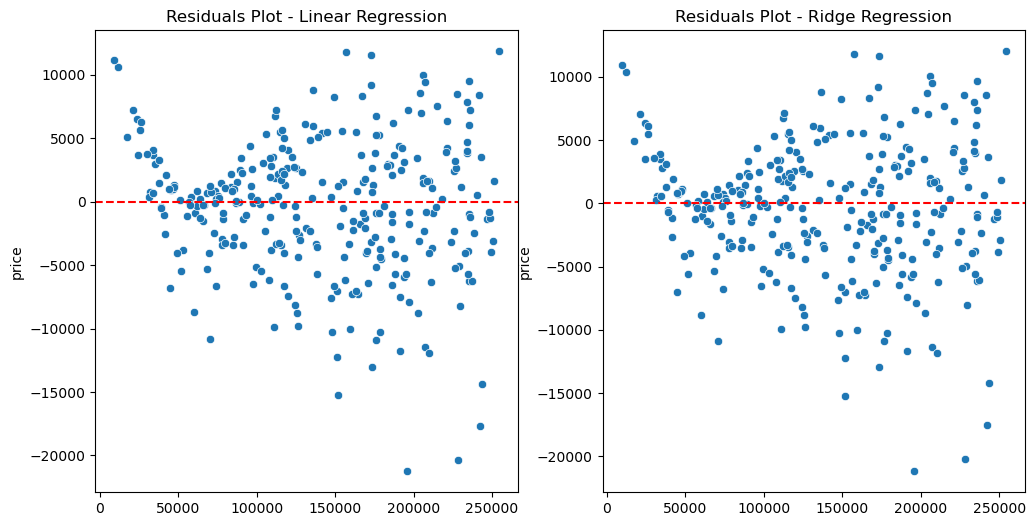

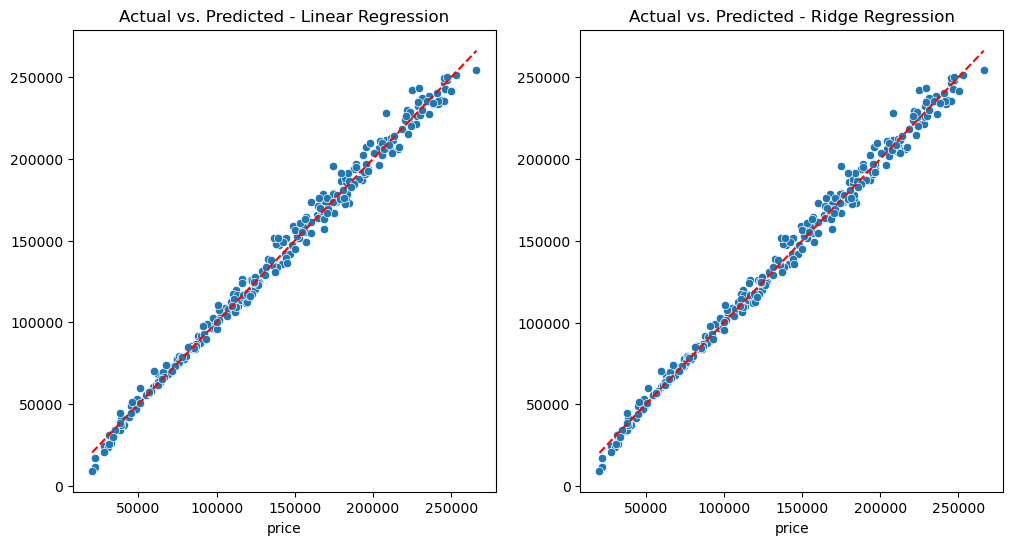

In [31]:
# Residuals plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_test_linear, y=y_test - y_pred_test_linear)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot - Linear Regression')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_test_ridge, y=y_test - y_pred_test_ridge)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot - Ridge Regression')

plt.show()

# Actual vs. Predicted plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='r')
plt.title('Actual vs. Predicted - Linear Regression')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='r')
plt.title('Actual vs. Predicted - Ridge Regression')

plt.show()